In [1]:
import tensorflow as tf
vocab_size = 2000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
    path='imdb.npz',
    num_words=vocab_size,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3,
)

2025-04-01 09:10:53.139316: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743498653.166619   33024 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743498653.175169   33024 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743498653.200554   33024 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743498653.200597   33024 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743498653.200603   33024 computation_placer.cc:177] computation placer alr

In [2]:
word_idx = tf.keras.datasets.imdb.get_word_index()
word_idx = {i: word for word, i in word_idx.items()}

print([word_idx[i] for i in x_train[0]])

['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'and', 'had', 'and', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'and', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'and', 'film', 'as', 'you', 'of', 'mine', 'and', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', 'and', 'and', 'with', 'heart', 'had', 'and', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', 'does', 'when', 'from', 'why', 'what', 'have', 'critics', 'they', 'is', 'you', 'that', "isn't"

In [3]:
print("Max length of a review:: ", len(max((x_train+x_test), key=len)))
print("Min length of a review:: ", len(min((x_train+x_test), key=len)))

Max length of a review::  2697
Min length of a review::  70


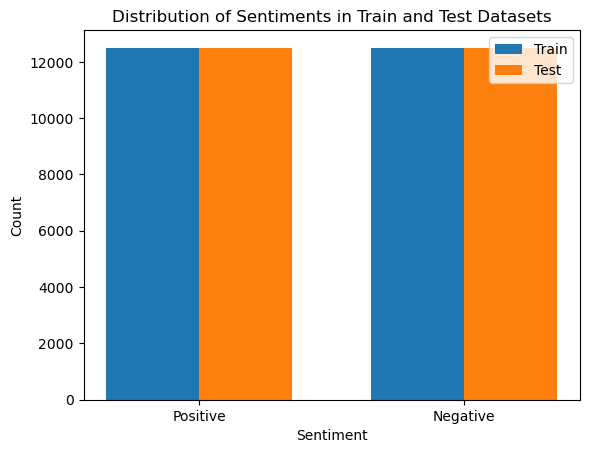

In [4]:
import numpy as np

import matplotlib.pyplot as plt

# Count the number of positive and negative sentiments in the training and test datasets
train_positive = np.sum(y_train)
train_negative = len(y_train) - train_positive
test_positive = np.sum(y_test)
test_negative = len(y_test) - test_positive

# Plot the distribution
labels = ['Positive', 'Negative']
train_counts = [train_positive, train_negative]
test_counts = [test_positive, test_negative]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, train_counts, width, label='Train')
bars2 = ax.bar(x + width/2, test_counts, width, label='Test')

# Add labels, title, and legend
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Distribution of Sentiments in Train and Test Datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [5]:
from tensorflow.keras.preprocessing import sequence
max_len = 600
x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)

In [10]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding ,SpatialDropout1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential


In [9]:
# fixing every word's embedding size to be 32
embd_len = 32

# Creating a RNN model
RNN_model = Sequential(name="Simple_RNN")
RNN_model.add(Embedding(vocab_size,
                        embd_len,
                        input_length=max_len))

# In case of a stacked(more than one layer of RNN)
# use return_sequences=True
RNN_model.add(SimpleRNN(128,
                        activation='tanh',
                        return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))

# printing model summary
print(RNN_model.summary())

# Compiling model
RNN_model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

# Training the model
history = RNN_model.fit(x_train, y_train,
                        batch_size=64,
                        epochs=20,
                        verbose=1,
                        validation_data=(x_test, y_test))

# Printing model score on test data
print()
print("Simple_RNN Score---> ", RNN_model.evaluate(x_test, y_test, verbose=0))


/home/kelvin/miniconda3/envs/linux-deep-gpu/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20


I0000 00:00:1743498702.924397   33143 service.cc:152] XLA service 0x7f6d9c003720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743498702.924485   33143 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-04-01 09:11:42.991905: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743498703.335869   33143 cuda_dnn.cc:529] Loaded cuDNN version 90501
I0000 00:00:1743498704.334254   33143 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 154ms/step - accuracy: 0.5099 - loss: 0.6938 - val_accuracy: 0.5645 - val_loss: 0.6710
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 143ms/step - accuracy: 0.6068 - loss: 0.6474 - val_accuracy: 0.6456 - val_loss: 0.7108
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 60s 153ms/step - accuracy: 0.7516 - loss: 0.5102 - val_accuracy: 0.7467 - val_loss: 0.5188
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 59s 151ms/step - accuracy: 0.7783 - loss: 0.4752 - val_accuracy: 0.6813 - val_loss: 0.5877
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 145ms/step - accuracy: 0.7522 - loss: 0.5238 - val_accuracy: 0.7633 - val_loss: 0.5084
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 56s 142ms/step - accuracy: 0.7090 - loss: 0.5805 - val_accuracy: 0.6387 - val_loss: 0.6247
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 59s 151ms/step - accuracy: 0.7300 - loss: 0.5325 - val_accuracy: 0.6164 - val_loss: 0.6379
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 150ms/step - accuracy: 0.6631 - loss: 0.6015 - val

In [11]:
# printing model summary
print(RNN_model.summary())

Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 600, 32)        │        64,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 254,213 (993.02 KB)

 Trainable params: 84,737 (331.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 169,476 (662.02 KB)

None


In [ ]:
# Defining Bidirectional LSTM model
bi_lstm_model = Sequential(name="Bidirectional_LSTM")
bi_lstm_model.add(Embedding(vocab_size,
                            embd_len,
                            input_length=max_len))
bi_lstm_model.add(Bidirectional(LSTM(128,
                                     activation='tanh',
                                     return_sequences=False)))
bi_lstm_model.add(Dense(1, activation='sigmoid'))

# Printing model summary
print(bi_lstm_model.summary())

# Compiling model summary
bi_lstm_model.compile(
  loss="binary_crossentropy",
  optimizer='adam',
  metrics=['accuracy']
)

# Training the model
history2 = bi_lstm_model.fit(x_train, y_train,
                             batch_size=64,
                             epochs=7,
                             verbose=1,
                             validation_data=(x_test, y_test))

# Printing model score on test data
print()
print("Bidirectional LSTM model Score---> ",
      bi_lstm_model.evaluate(x_test, y_test, verbose=1))


Model: "Bidirectional_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 200ms/step - accuracy: 0.6516 - loss: 0.6066 - val_accuracy: 0.7489 - val_loss: 0.5173
Epoch 2/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 75s 191ms/step - accuracy: 0.8217 - loss: 0.4054 - val_accuracy: 0.8627 - val_loss: 0.3340
Epoch 3/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 73s 188ms/step - accuracy: 0.8661 - loss: 0.3327 - val_accuracy: 0.7831 - val_loss: 0.4644
Epoch 4/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 214ms/step - accuracy: 0.7472 - loss: 0.5228 - val_accuracy: 0.8372 - val_loss: 0.4035
Epoch 5/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 201ms/step - accuracy: 0.8597 - loss: 0.3439 - val_accuracy: 0.8585 - val_loss: 0.3446
Epoch 6/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 200ms/step - accuracy: 0.8813 - loss: 0.2874 - val_accuracy: 0.7805 - val_loss: 0.4638
Epoch 7/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 203ms/step - accuracy: 0.8738 - loss: 0.3057 - val_accuracy: 0.8651 - val_loss: 0.3161

782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.8639 - loss: 0.3201
Bidirec